# Import Libraries

Root Mean Squared Error: 699.7131084117639
Coefficients: [ 138.68158142 -126.24028691]
Intercept: 1608.7695329177693


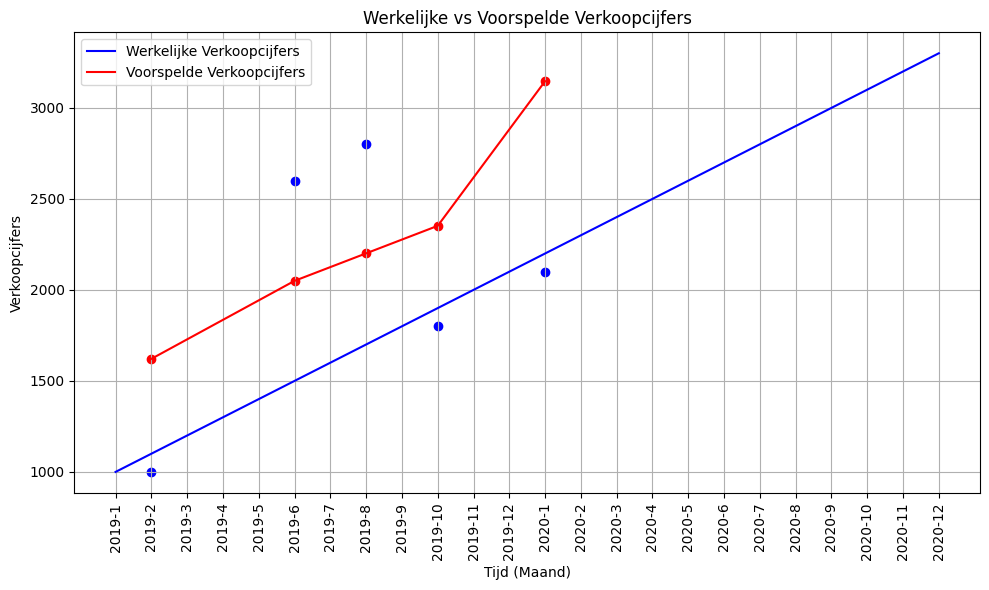

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Simuleer de SQL-query result in een pandas DataFrame
data = {
    'Year': [2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'MonthlySales': [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

df = pd.DataFrame(data)

# Voeg een seizoensvariabele toe
df['Season'] = df['Month'].apply(lambda x: (x%12 + 3)//3) # Winter=1, Spring=2, Summer=3, Fall=4

# Features en target
X = df[['Month', 'Season']]
y = df['MonthlySales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineaire regressie model
model = LinearRegression()
model.fit(X_train, y_train)

# Voorspellingen
y_pred = model.predict(X_test)

# Evaluatie van het model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

# Coefficiënten
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Visualisatie van de resultaten
plt.figure(figsize=(10, 6))
plt.plot(df['Year'].astype(str) + '-' + df['Month'].astype(str), df['MonthlySales'], label='Werkelijke Verkoopcijfers', color='blue')
plt.scatter(X_test['Month'], y_test, color='blue')
plt.scatter(X_test['Month'], y_pred, color='red')
plt.plot(X_test.sort_values('Month')['Month'], y_pred[np.argsort(X_test['Month'])], label='Voorspelde Verkoopcijfers', color='red')
plt.xlabel('Tijd (Maand)')
plt.ylabel('Verkoopcijfers')
plt.title('Werkelijke vs Voorspelde Verkoopcijfers')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()
